# Pymaceuticals Inc.
---

### Analysis

- The correlation between mouse weight and tumor volume is 0.84, which is a strong correlation. In the scatter plot below, we can see that as mouse weight increases, so does the average tumor volume.
- By examining all of the data below, we can see that Capomulin and Ramicane are the most effective treatments for reducing tumor size in mice. 
- By examining the bar graph, we've also tested Capomulin and Ramicane on the most mice (well over 200), whereas Propriva has only been tested on a little over 150 mice.


 

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_metadata_df =  pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)
mice_combined_df = pd.merge(study_results_df, mouse_metadata, on="Mouse ID",how='left')

# Display the data table for preview
mice_combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [101]:
# Checking the number of mice.
mice = mice_combined_df["Mouse ID"].value_counts()
number_of_mice = len(mice)
number_of_mice

249

In [102]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#label each row of the combined DataFrame as duplicate or not, then create a new Data Frame where we keep only values that are duplicates (==True)
mice_duplicates = mice_combined_df[mice_combined_df[["Mouse ID","Timepoint"]].duplicated()==True]
duplicate_mice_id = mice_duplicates["Mouse ID"].unique()
duplicate_mice_id


array(['g989'], dtype=object)

In [103]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicates_data = mice_combined_df.loc[mice_combined_df["Mouse ID"]== duplicate_mice_id[0]]
mice_duplicates_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [104]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_clean_df = mice_combined_df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep=False)
mice_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [105]:
# Checking the number of mice in the clean DataFrame.
clean_mice = mice_clean_df["Mouse ID"].value_counts()
number_of_clean_mice = len(clean_mice)
number_of_clean_mice

249

## Summary Statistics

In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_data = mice_clean_df.set_index(["Drug Regimen"]).groupby("Drug Regimen")
mean_tumor = drug_data["Tumor Volume (mm3)"].mean()
median_tumor = drug_data["Tumor Volume (mm3)"].median()
variance_tumor = drug_data["Tumor Volume (mm3)"].var()
std_tumor = drug_data["Tumor Volume (mm3)"].std()
sem_tumor = drug_data["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_data_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                             "Median Tumor Volume": median_tumor,
                             "Tumor Volume Variance": variance_tumor,
                             "Tumor Volume Std. Dev.": std_tumor,
                             "Tumor Volume Std. Err.": sem_tumor})
drug_data_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [107]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_data = mice_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(['mean','median','var','std','sem'], axis=0)
agg_drug_data

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

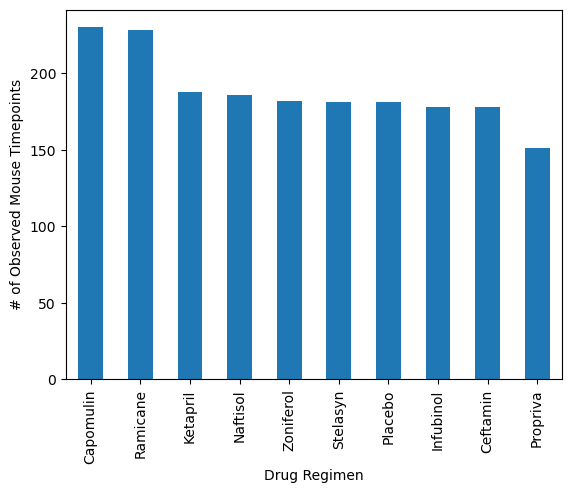

In [108]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#filter DataFrame down to only Drug Regimen and Timepoints
mice_time = mice_clean_df[["Drug Regimen","Timepoint"]]
#count per drug
mice_drugs = mice_time["Drug Regimen"].value_counts()
mice_drugs

mice_drugs.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")
plt.show()


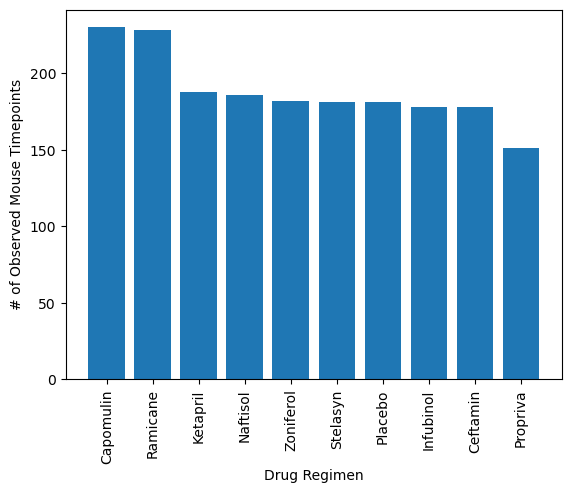

In [109]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_drugs.index
y_axis = mice_drugs.values

plt.bar(x_axis,y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

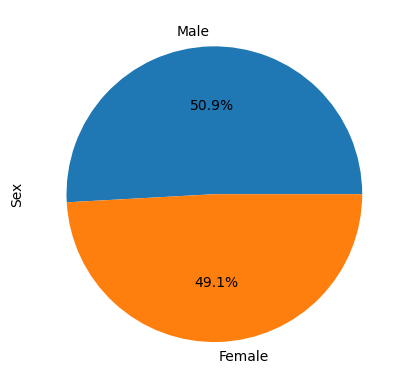

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = mice_clean_df["Sex"].value_counts()

mice_gender.plot(kind='pie', autopct="%1.1f%%")
plt.show()

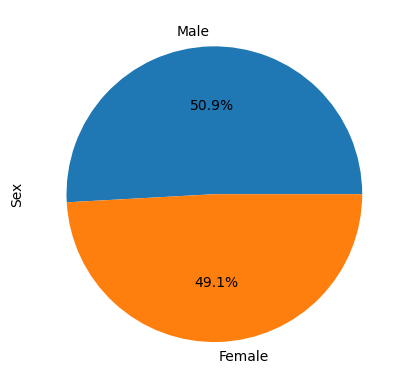

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label = mice_gender.index
value = mice_gender.values

plt.pie(value, labels=label, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [112]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#reduce dataframe to only include the 4 drugs listed above
reduced_df = mice_clean_df.loc[(mice_clean_df["Drug Regimen"] == "Capomulin") | 
                               (mice_clean_df["Drug Regimen"] == "Ramicane") |
                               (mice_clean_df["Drug Regimen"] == "Infubinol") |
                               (mice_clean_df["Drug Regimen"] == "Ceftamin")] 

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = reduced_df.groupby(["Mouse ID"]).max()
last_timepoint = last_timepoint_df["Timepoint"]
last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_tumor_vol = pd.merge(last_timepoint,reduced_df,how='left',on=["Mouse ID","Timepoint"])
max_tumor_vol.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [123]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = max_tumor_vol.loc[max_tumor_vol['Drug Regimen']== drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_list.append(tumor_volume)
    
    #calculate the IQR
    quartiles = tumor_volume.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    #print the results
    print(f"The lower quartile of {drug} is: {round(lowerq,2)}")
    print(f"The upper quartile of {drug} is: {round(upperq,2)}")
    print(f"The interquartile range of {drug} is: {round(iqr,2)}")
    print(f"Values below {round(lower_bound,2)} and above {round(upper_bound,2)} could be outliers for {drug}.")
    print(f"--------------------------------------------")



The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
Values below 20.7 and above 51.83 could be outliers for Capomulin.
--------------------------------------------
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
Values below 17.91 and above 54.31 could be outliers for Ramicane.
--------------------------------------------
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
Values below 36.83 and above 82.74 could be outliers for Infubinol.
--------------------------------------------
The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range of Ceftamin is: 15.58
Values below 25.36 and above 87.67 could be outliers for Ceftamin.
--------------------------------------------


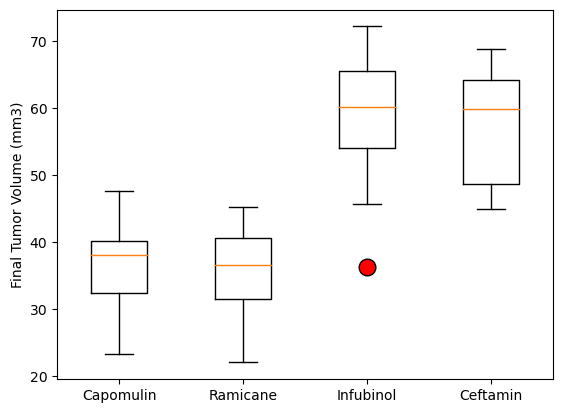

In [135]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
flier_props = dict(markerfacecolor = 'r', markersize = 12)
ax1.boxplot(tumor_volume_list, labels=treatments, flierprops=flier_props)
plt.show()

## Line and Scatter Plots

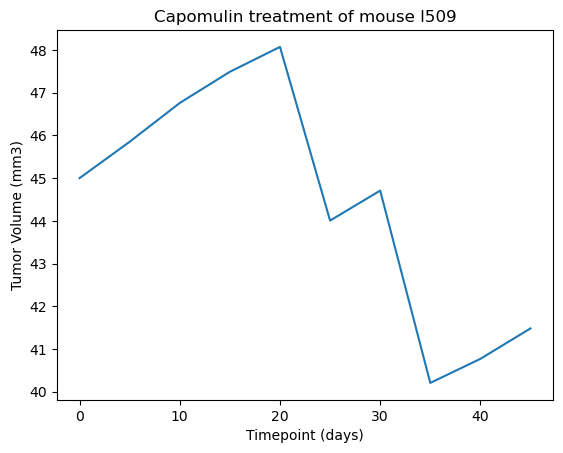

In [147]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = mice_clean_df.loc[mice_clean_df["Drug Regimen"]=="Capomulin"]
mouse_l509 = capomulin_df.loc[capomulin_df['Mouse ID']=='l509']

plt.title('Capomulin treatment of mouse l509')
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
mouse_l509_plot = plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'])


/var/folders/p1/lj8rf2dn4mv__pk8yvq9v1ww0000gp/T/ipykernel_37192/3320421312.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_average = capomulin_df.groupby(['Mouse ID']).mean()


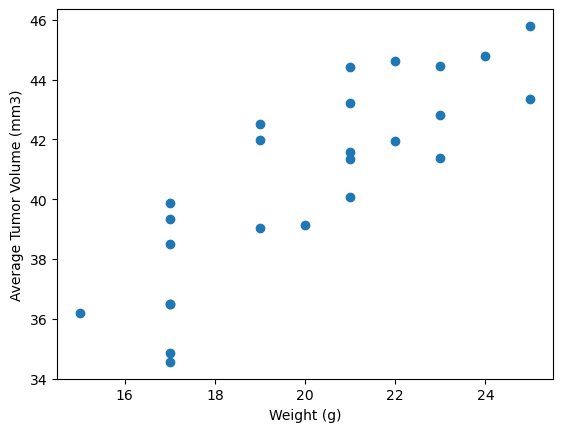

In [153]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_average = capomulin_df.groupby(['Mouse ID']).mean()
capomulin_average

plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


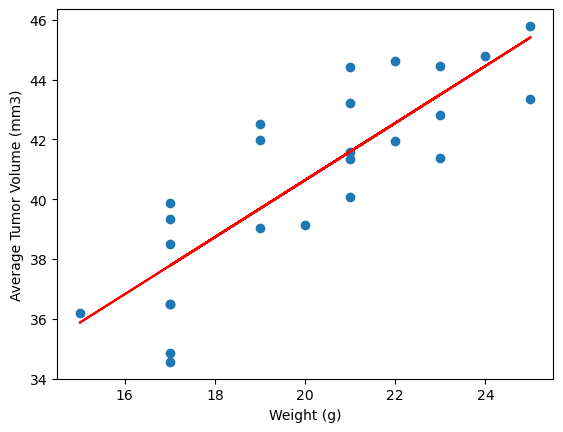

In [157]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
fit = slope * capomulin_average['Weight (g)'] + intercept
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],fit, color='r')
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()
